In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: DATA INGESTION

In [61]:
df=pd.read_csv("height-weight.csv")

In [62]:
df.head(5)

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


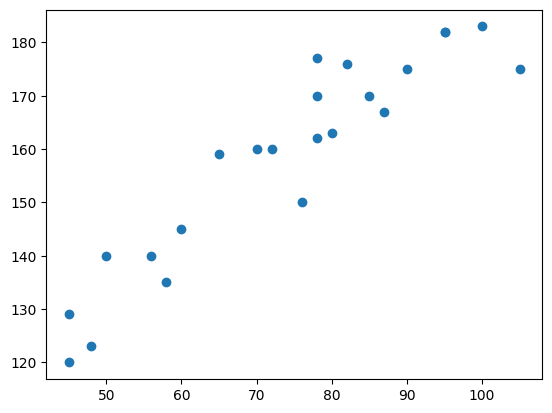

In [63]:
plt.scatter(df.Weight,df.Height)

# STEP 2 3 KI JRURT NHI PEHLE SE EDA KIYA HUA DATA H AND NO NEW FEATURE REQUIRED

# STEP 4: DIVIDE DATA IN X AND Y

In [64]:
X=df[["Weight"]]
y=df["Height"]

In [65]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [66]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

# STEP 5: TRAIN TEST SPLIT

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [69]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((17, 1), (6, 1), (17,), (6,))

# STEP 6: SCALING

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [71]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [73]:
X_train,X_test

(array([[ 0.37554243],
        [-0.36825034],
        [-1.73187043],
        [ 0.00364604],
        [ 0.25157697],
        [ 0.87140428],
        [-1.11204312],
        [ 0.56149062],
        [-1.91781863],
        [ 0.12761151],
        [-0.24428488],
        [-1.23600858],
        [ 0.12761151],
        [ 1.18131794],
        [ 1.80114525],
        [ 1.18131794],
        [ 0.12761151]]),
 array([[-1.91781863],
        [-0.678164  ],
        [-0.98807766],
        [ 1.49123159],
        [ 0.68545609],
        [-1.60790497]]))

# MODEL TRAINING

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
regressor=LinearRegression()

In [76]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [77]:
regressor.coef_

array([17.7307072])

In [78]:
regressor.intercept_

np.float64(160.0)

PREDICTION ON TRAIN DATA

In [79]:
y_pred_train=regressor.predict(X_train)

In [85]:
Y_train,y_pred_train

(10    176
 4     160
 2     123
 18    150
 6     163
 7     175
 1     135
 14    170
 0     120
 15    177
 22    160
 21    140
 9     170
 8     182
 12    175
 11    182
 5     162
 Name: Height, dtype: int64,
 array([166.65863288, 153.47066096, 129.29271243, 160.06464692,
        164.46063756, 175.45061417, 140.28268904, 169.95562586,
        125.99571945, 162.26264224, 155.66865628, 138.08469371,
        162.26264224, 180.94560247, 191.93557907, 180.94560247,
        162.26264224]))

In [86]:
y_pred_test=regressor.predict(X_test)

In [87]:
Y_test,y_pred_test

(20    129
 17    159
 3     145
 13    183
 19    167
 16    140
 Name: Height, dtype: int64,
 array([125.99571945, 147.97567266, 142.48068436, 186.44059077,
        172.15362118, 131.49070775]))

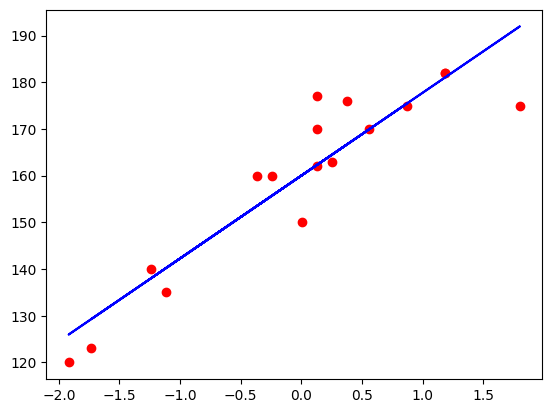

In [88]:
plt.scatter(X_train,Y_train,color="red")
plt.plot(X_train,y_pred_train,color="blue")

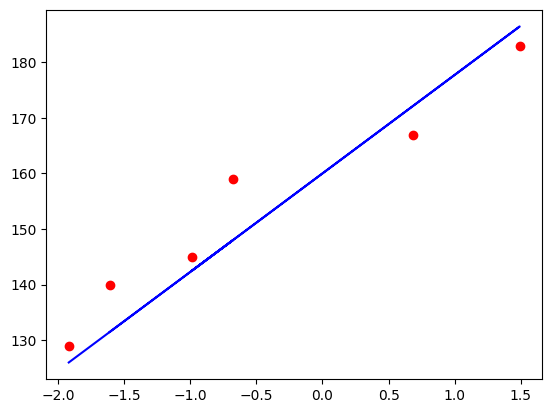

In [89]:
plt.scatter(X_test,Y_test,color="red")
plt.plot(X_test,y_pred_test,color="blue")

# STEP 8: EVALUATION METRICS

In [90]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [93]:
mse=mean_squared_error(Y_test,y_pred_test)
mae=mean_absolute_error(Y_test,y_pred_test)
rmse=np.sqrt(mse)

In [94]:
print(mse,mae,rmse)

41.285662830455514 5.608571289304838 6.425392037102134


In [95]:
score=r2_score(Y_test,y_pred_test)

In [96]:
score

0.8721036174256606

In [102]:
adjR2score=1-((1-score)*(len(Y_test)-1)/(len(Y_test)-1-1))

In [103]:
adjR2score

0.8401295217820757